# Notebook Summary

## Table of Contents
1. [About Dataset Attritation](#about-dataset-attritation)


2. [Data Processing](#data-processing)

    2.1 [Importing Libraries](#importing-libraries)
    
    2.2 [Columns Removed](#columns-removed)
    
    2.3 [Separation of Variables](#separation-of-variables)
    
    
3. [Visualization of Database](#visualization-of-database)

    3.1 [Visualization of Category Variables](#visualization-of-category-variables)
    
    3.2 [Visualization of Numeric Variables](#visualization-of-numeric-variables)
    
    
4. [Machine Learning](#machine-learning)

    4.1 [Binary Logistic Regression](#binary-logistic-regression)
    
    4.2 [Random Forest](#random-forest)
    
    
5. [Expected Results](#expected-results)

# 1. About Dataset Attritation

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

# 2. Data Processing <a name="data-processing"></a>

# 2.1 Importing Libraries <a name="importing-libraries"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import statsmodels.api as sm
from mlxtend.feature_selection import SequentialFeatureSelector

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


sns.set(style="darkgrid",font_scale=1.5)
sns.set_context("poster",font_scale = .7)

In [2]:
df = pd.read_csv('Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df[['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction']].head(10)

,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction
0,2,4,1
1,3,2,4
2,4,3,2
3,4,3,3
4,1,2,4
5,4,4,3
6,3,1,1
7,4,3,2
8,4,3,2
9,3,3,2


In [7]:
df[['WorkLifeBalance', 'PerformanceRating']].head(10)

,WorkLifeBalance,PerformanceRating
0,1,3
1,3,4
2,3,3
3,3,3
4,3,3
5,2,3
6,2,4
7,3,4
8,3,4
9,2,3


In [8]:
df['OverTime'].head()

0    Yes
1     No
2    Yes
3    Yes
4     No
Name: OverTime, dtype: object

### Like the values  'EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance', 'PerformanceRating' are classificated for levels of satisfation, they will get dummy.

# 2.2 Columns Removed <a name="columns-removed"></a>

### 2.2.1 There are the same value on the raw:
1.1 EmployeeNumber

1.2 EmployeeCount

1.3 StandardHours

1.4 Over18

### 2.2.2 These informations could be substituted for MonthRate:
2.1 HourlyRate

2.2 DailyRate

In [9]:
df = df.drop(columns=['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'HourlyRate', 'DailyRate', 'Over18'])

In [10]:
df.shape

(1470, 29)

In [11]:
df['StockOptionLevel']

0       0
1       1
2       0
3       0
4       1
       ..
1465    1
1466    1
1467    1
1468    0
1469    0
Name: StockOptionLevel, Length: 1470, dtype: int64

In [12]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [13]:
df = df.drop_duplicates()

In [14]:
df.shape

(1470, 29)

# 2.3 Separation of Variables <a name="separation-of-variables"></a>

### The variables will be separated for categorical and numeric variables

In [15]:
# Numeric variables
col_cat = df.select_dtypes(include=['object'])

In [16]:
col_cat.shape

(1470, 8)

In [17]:
col_cat.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [18]:
df.select_dtypes(include = 'object').describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


In [19]:
# Variáveis Numéricas 
col_num = df.select_dtypes(include=['int64'])

In [20]:
col_num.columns

Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Like it sees, every the categorical variables are right, but some numeric variables aren't category. For this, will be analysed what the variabels will get dummy, if the use the Machine Learning be necessary.

# 3. Visualization of Database <a name="visualization-of-database"></a>

# 3.1 Visualization of Category Variables <a name="visualization-of-category-variables"></a>

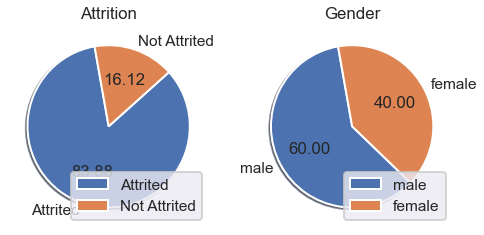

In [21]:
# Attritation e Gender

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))
sns.set_palette("pastel")

# Attrition
target = df.iloc[:, 1].value_counts()
ax1.pie(target, labels=["Attrited", "Not Attrited"], autopct="%0.2f", shadow=True, startangle=100)
ax1.set_title("Attrition")
ax1.legend(loc="lower right")

# Gender
target = df['Gender'].value_counts()
ax2.pie(target, labels=["male", "female"], autopct="%0.2f", shadow=True, startangle=100)
ax2.set_title("Gender")
ax2.legend(loc="lower right")

plt.show()

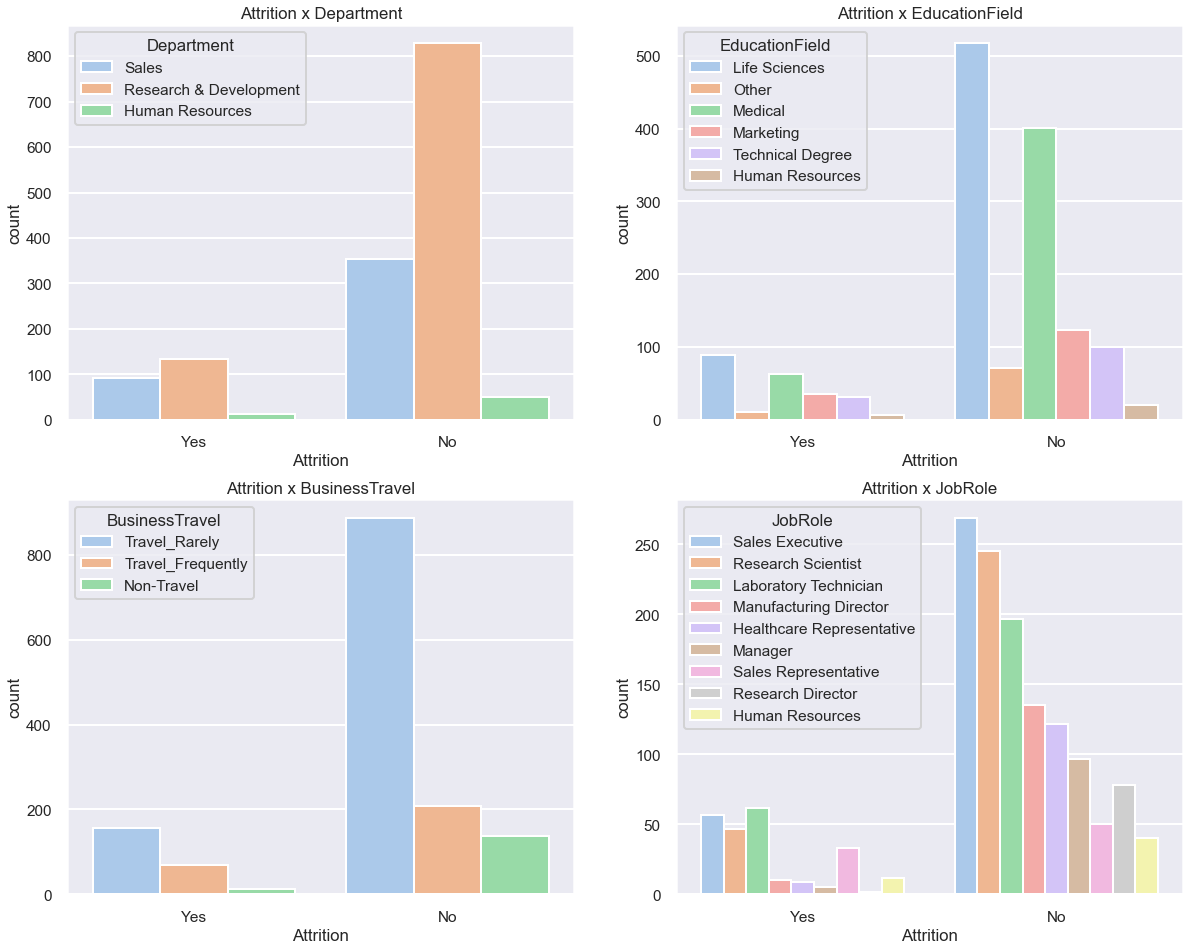

In [22]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# Definindo as cores
sns.set_palette("pastel")

sns.countplot(x='Attrition', hue='Department', data=df, ax = ax1)
sns.countplot(x='Attrition', hue='EducationField', data=df, ax = ax2)
sns.countplot(x='Attrition', hue='BusinessTravel', data=df, ax=ax3)
sns.countplot(x='Attrition', hue='JobRole', data=df, ax = ax4)

# Títulos
ax1.set_title('Attrition x Department')
ax2.set_title('Attrition x EducationField')
ax3.set_title('Attrition x BusinessTravel')
ax4.set_title('Attrition x JobRole')


plt.show()

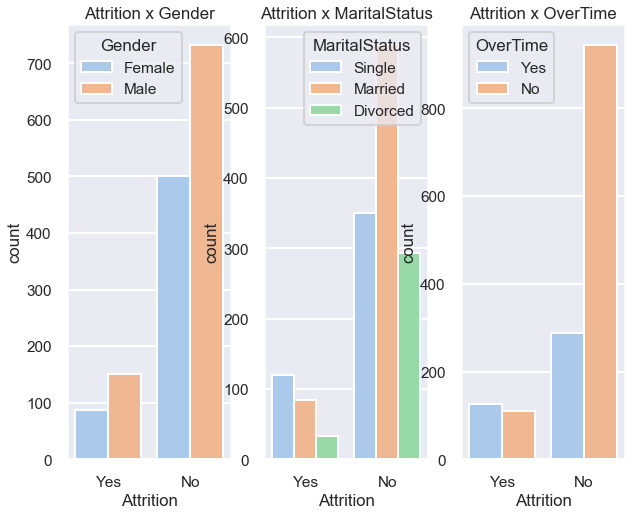

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 8))

# Definindo as cores
sns.set_palette("pastel")

sns.countplot(x='Attrition', hue='Gender', data=df, ax = ax1)
sns.countplot(x='Attrition', hue='MaritalStatus', data=df, ax = ax2)
sns.countplot(x='Attrition', hue='OverTime', data=df, ax=ax3)


# Títulos
ax1.set_title('Attrition x Gender')
ax2.set_title('Attrition x MaritalStatus')
ax3.set_title('Attrition x OverTime')



plt.show()

### The columns Department, EducationField, BusinessTravel, Gender will be removed because they don't have diferent default with the target.

In [24]:
df = df.drop(columns=['Department', 'EducationField', 'BusinessTravel', 'Gender'])

In [25]:
df.shape

(1470, 25)

## Convertating the variabels  Education, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, PerformanceRating, RelationshipSatisfaction and WorkLifeBalance to category variables.

In [26]:
col_num.columns

Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [27]:
# Education

df["Education"] = df["Education"].replace({1:"Below College",2:"College",3:"Bachelor",4:"Master",5:"Doctor"})

In [28]:
# EnvironmentSatisfaction

df["EnvironmentSatisfaction"] = df["EnvironmentSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})

In [29]:
# JobInvolvement

df["JobInvolvement"] = df["JobInvolvement"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})

In [30]:
# JobLevel

df["JobLevel"] = df["JobLevel"].replace({1:"Entry Level",2:"Junior Level",3:"Mid Level",4:"Senior Level",
                                         5:"Executive Level"})

In [31]:
# JobSatisfaction

df["JobSatisfaction"] = df["JobSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})

In [32]:
# PerformanceRating

df["PerformanceRating"] = df["PerformanceRating"].replace({1:"Low",2:"Good",3:"Excellent",4:"Outstanding"})

In [33]:
# RelationshipSatisfaction

df["RelationshipSatisfaction"] = df["RelationshipSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})

In [34]:
# WorkLifeBalance

df["WorkLifeBalance"] = df["WorkLifeBalance"].replace({1:"Bad",2:"Good",3:"Better",4:"Best"})

In [35]:
# int test
test_num = df.select_dtypes(include=['int64'])
test_num.columns

Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

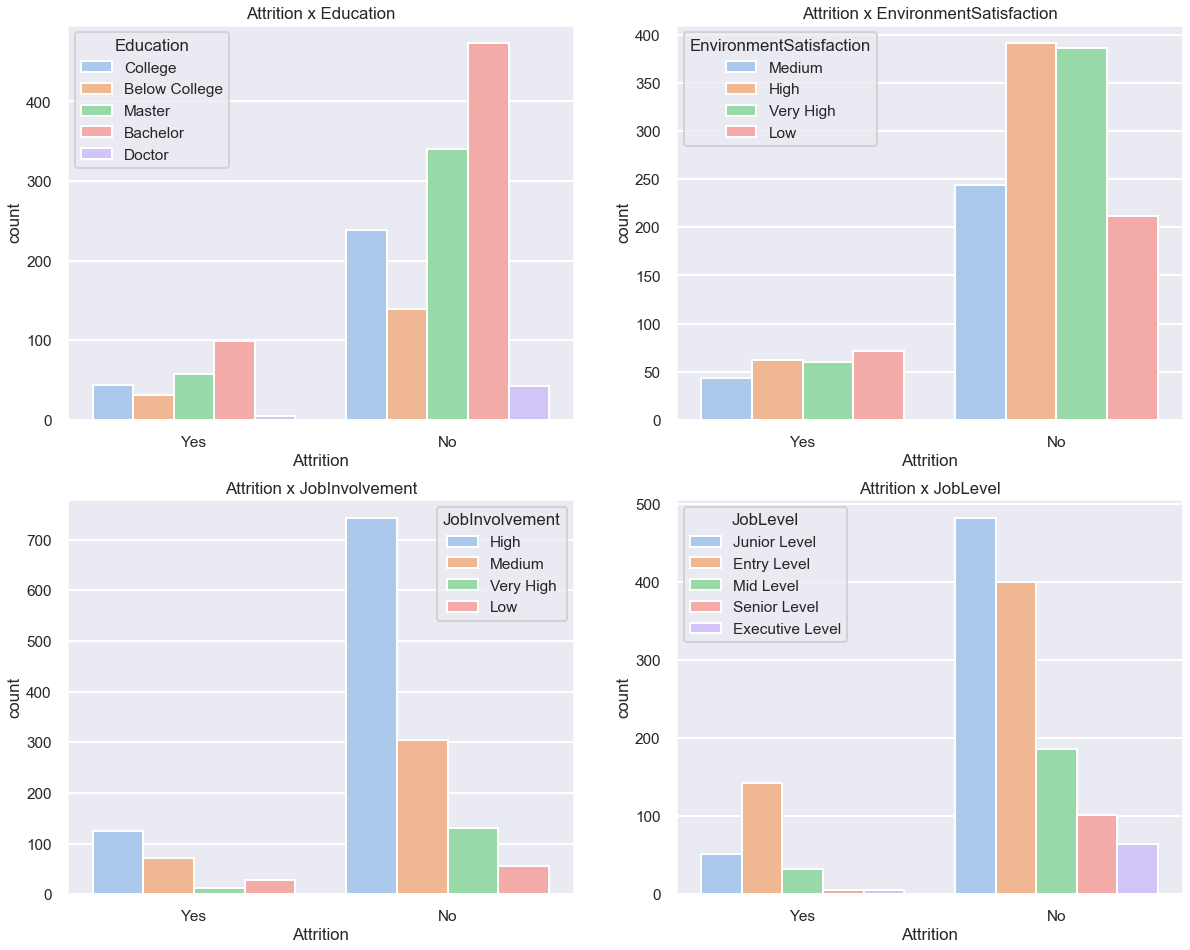

In [36]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# Definindo as cores
sns.set_palette("pastel")

sns.countplot(x='Attrition', hue='Education', data=df, ax = ax1)
sns.countplot(x='Attrition', hue='EnvironmentSatisfaction', data=df, ax = ax2)
sns.countplot(x='Attrition', hue='JobInvolvement', data=df, ax=ax3)
sns.countplot(x='Attrition', hue='JobLevel', data=df, ax = ax4)

# Títulos
ax1.set_title('Attrition x Education')
ax2.set_title('Attrition x EnvironmentSatisfaction')
ax3.set_title('Attrition x JobInvolvement')
ax4.set_title('Attrition x JobLevel')


plt.show()

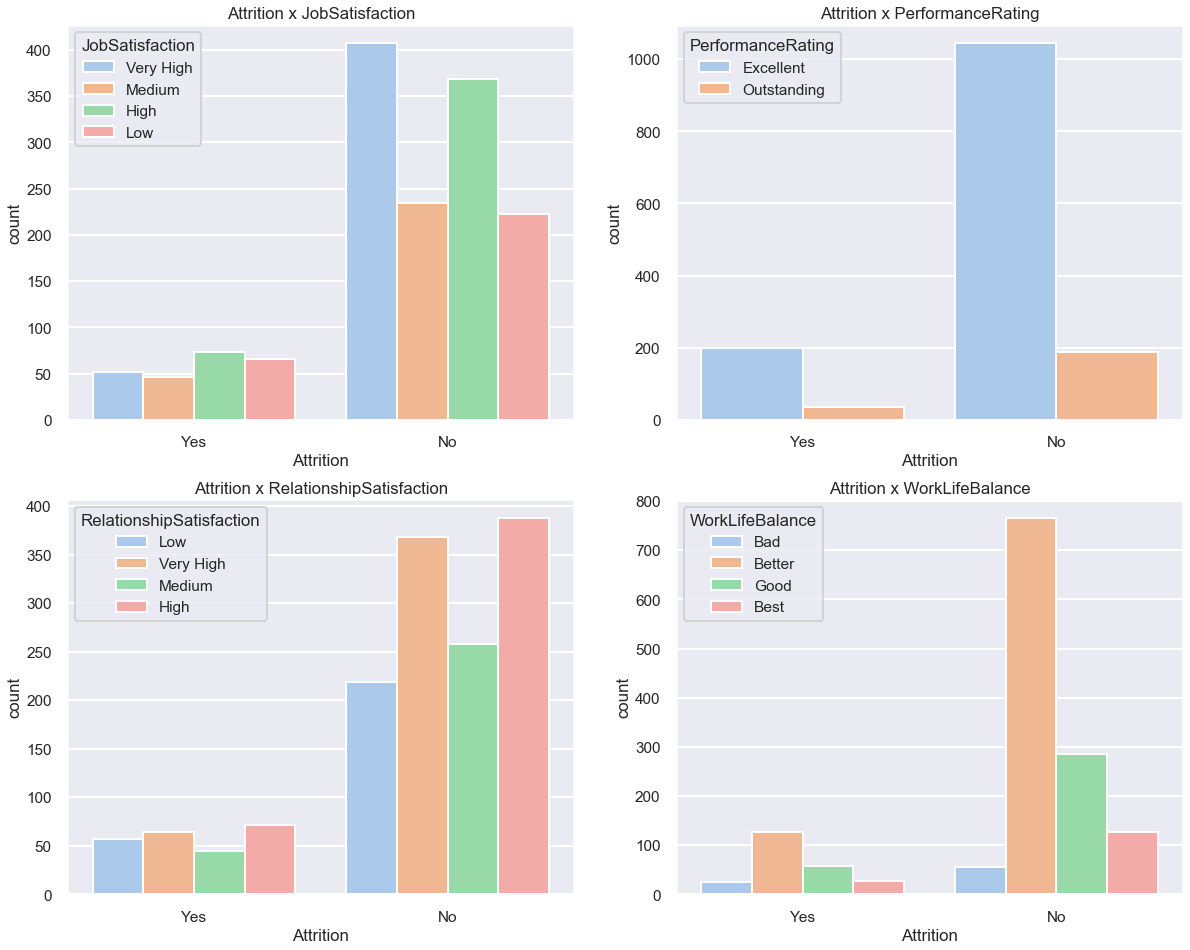

In [37]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# Definindo as cores
sns.set_palette("pastel")

sns.countplot(x='Attrition', hue='JobSatisfaction', data=df, ax = ax1)
sns.countplot(x='Attrition', hue='PerformanceRating', data=df, ax = ax2)
sns.countplot(x='Attrition', hue='RelationshipSatisfaction', data=df, ax=ax3)
sns.countplot(x='Attrition', hue='WorkLifeBalance', data=df, ax = ax4)

# Títulos
ax1.set_title('Attrition x JobSatisfaction')
ax2.set_title('Attrition x PerformanceRating')
ax3.set_title('Attrition x RelationshipSatisfaction')
ax4.set_title('Attrition x WorkLifeBalance')


plt.show()

# 3.2 Visualization of Numeric Variables <a name="visualization-of-numeric-variables"></a>

In [38]:

var_num = test_num

In [39]:
var_num.head()

,Age,DistanceFromHome,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,5993,19479,8,11,0,8,0,6,4,0,5
1,49,8,5130,24907,1,23,1,10,3,10,7,1,7
2,37,2,2090,2396,6,15,0,7,3,0,0,0,0
3,33,3,2909,23159,1,11,0,8,3,8,7,3,0
4,27,2,3468,16632,9,12,1,6,3,2,2,2,2


In [40]:
var_num.shape

(1470, 13)

In [41]:
var_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   DistanceFromHome         1470 non-null   int64
 2   MonthlyIncome            1470 non-null   int64
 3   MonthlyRate              1470 non-null   int64
 4   NumCompaniesWorked       1470 non-null   int64
 5   PercentSalaryHike        1470 non-null   int64
 6   StockOptionLevel         1470 non-null   int64
 7   TotalWorkingYears        1470 non-null   int64
 8   TrainingTimesLastYear    1470 non-null   int64
 9   YearsAtCompany           1470 non-null   int64
 10  YearsInCurrentRole       1470 non-null   int64
 11  YearsSinceLastPromotion  1470 non-null   int64
 12  YearsWithCurrManager     1470 non-null   int64
dtypes: int64(13)
memory usage: 160.8 KB


In [42]:
var_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.5,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.0,25.0
StockOptionLevel,1470.0,0.793878,0.852077,0.0,0.0,1.0,1.0,3.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.0,40.0
TrainingTimesLastYear,1470.0,2.799320,1.289271,0.0,2.0,3.0,3.0,6.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.0,40.0


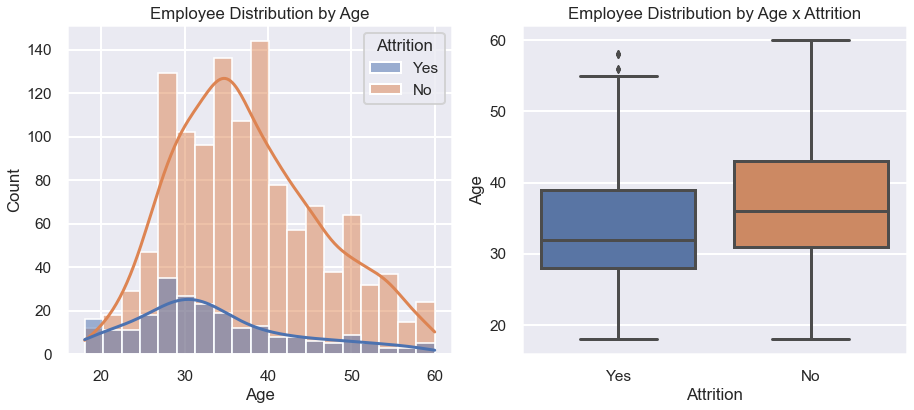

In [43]:
#Visualization to show Employee Distribution by Age.
plt.figure(figsize=(13,6))
sns.set_palette("deep")
plt.subplot(1,2,1)
sns.histplot(x="Age",hue="Attrition",data=df,kde=True)
plt.title("Employee Distribution by Age")


#Visualization to show Employee Distribution by Age & Attrition.
plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="Age",data=df)
plt.title("Employee Distribution by Age x Attrition")
plt.tight_layout()
plt.show()

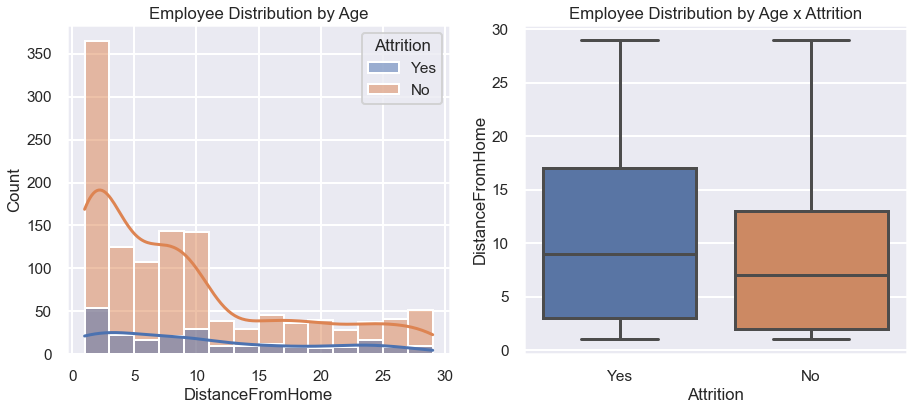

In [44]:
#Visualization to show Employee Distribution by Age.
plt.figure(figsize=(13,6))
sns.set_palette("deep")
plt.subplot(1,2,1)
sns.histplot(x="DistanceFromHome",hue="Attrition",data=df,kde=True)
plt.title("Employee Distribution by Age")


#Visualization to show Employee Distribution by Age & Attrition.
plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="DistanceFromHome",data=df)
plt.title("Employee Distribution by Age x Attrition")
plt.tight_layout()
plt.show()

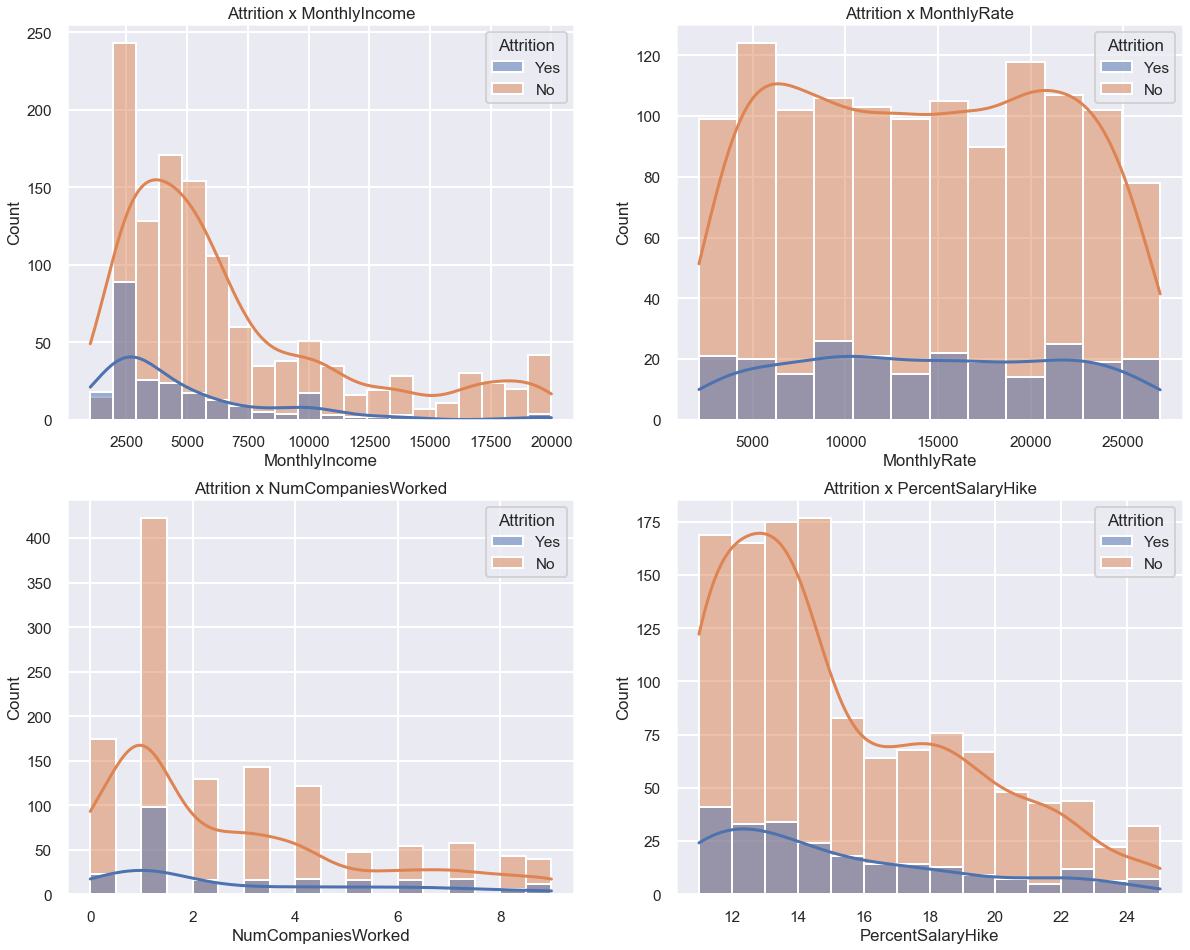

<Figure size 936x432 with 0 Axes>

In [45]:
# MomthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike x Attrition

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
plt.figure(figsize=(13,6))
sns.set_palette("deep")


sns.histplot(x="MonthlyIncome",hue="Attrition",data=df,kde=True, ax = ax1)
sns.histplot(x="MonthlyRate",hue="Attrition",data=df,kde=True, ax = ax2)
sns.histplot(x="NumCompaniesWorked",hue="Attrition",data=df,kde=True, ax = ax3)
sns.histplot(x="PercentSalaryHike",hue="Attrition",data=df,kde=True, ax = ax4)


# Titles
ax1.set_title('Attrition x MonthlyIncome')
ax2.set_title('Attrition x MonthlyRate')
ax3.set_title('Attrition x NumCompaniesWorked')
ax4.set_title('Attrition x PercentSalaryHike')


plt.show()

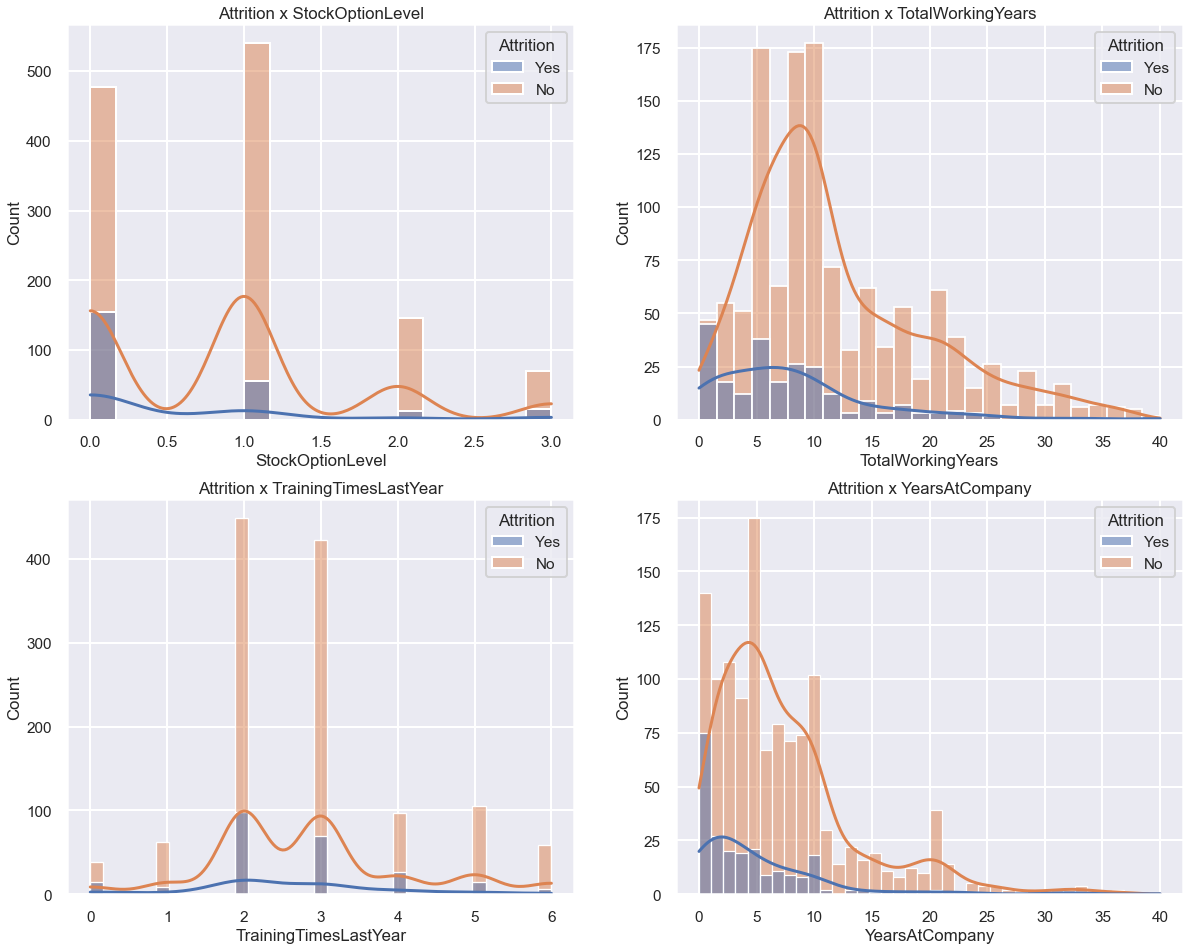

<Figure size 936x432 with 0 Axes>

In [46]:
# StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany x Attrition

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
plt.figure(figsize=(13,6))
sns.set_palette("deep")


sns.histplot(x="StockOptionLevel",hue="Attrition",data=df,kde=True, ax = ax1)
sns.histplot(x="TotalWorkingYears",hue="Attrition",data=df,kde=True, ax = ax2)
sns.histplot(x="TrainingTimesLastYear",hue="Attrition",data=df,kde=True, ax = ax3)
sns.histplot(x="YearsAtCompany",hue="Attrition",data=df,kde=True, ax = ax4)


# Titles
ax1.set_title('Attrition x StockOptionLevel')
ax2.set_title('Attrition x TotalWorkingYears')
ax3.set_title('Attrition x TrainingTimesLastYear')
ax4.set_title('Attrition x YearsAtCompany')


plt.show()

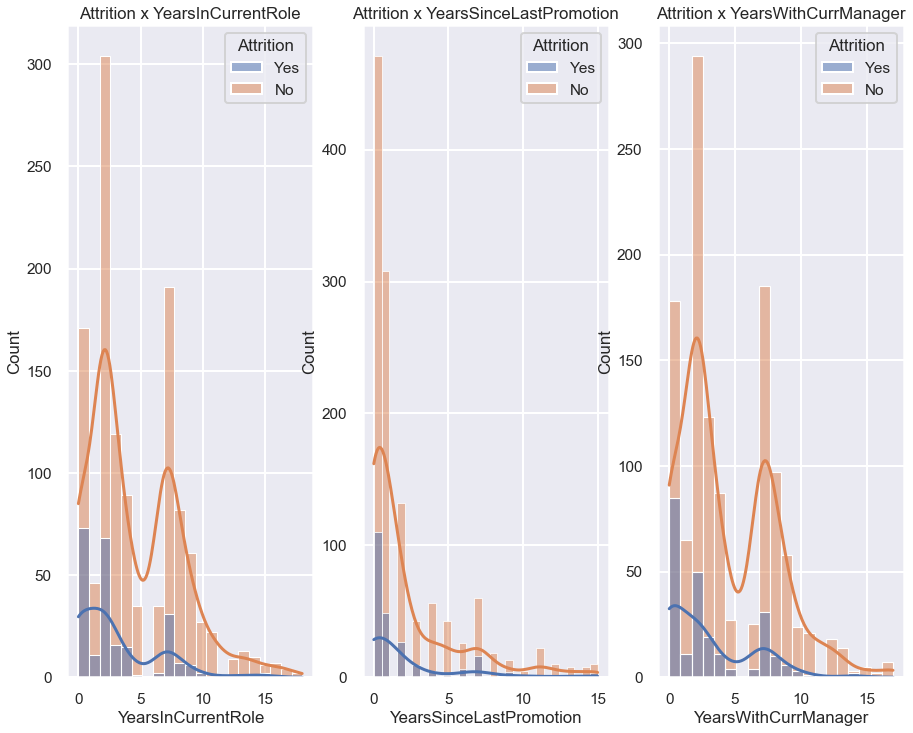

In [47]:
# YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager x Attrition 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 12))

# Colors
sns.set_palette("deep")

sns.histplot(x="YearsInCurrentRole",hue="Attrition",data=df,kde=True, ax = ax1)
sns.histplot(x="YearsSinceLastPromotion",hue="Attrition",data=df,kde=True, ax = ax2)
sns.histplot(x="YearsWithCurrManager",hue="Attrition",data=df,kde=True, ax = ax3)


# Titles
ax1.set_title('Attrition x YearsInCurrentRole')
ax2.set_title('Attrition x YearsSinceLastPromotion')
ax3.set_title('Attrition x YearsWithCurrManager')



plt.show()

# 4. Machine Learning <a name="machine-learning"></a>
-- It will use Machine Learning to select the betters variables

# 4.1 Binary Logistic Regression <a name="binary-logistic-regression"></a>

In [48]:
# Separating the variables to X and Y

x = df.drop('Attrition', axis=1) 
y = df['Attrition']

In [49]:
x.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,College,Medium,High,Junior Level,Sales Executive,Very High,Single,5993,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,8,Below College,High,Medium,Junior Level,Research Scientist,Medium,Married,5130,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,2,College,Very High,Medium,Entry Level,Laboratory Technician,High,Single,2090,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,3,Master,Very High,High,Entry Level,Research Scientist,High,Married,2909,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,2,Below College,Low,High,Entry Level,Laboratory Technician,Medium,Married,3468,...,Excellent,Very High,1,6,3,Better,2,2,2,2


In [50]:
x_object = x.select_dtypes(include=['object'])

In [51]:
x_object.columns

Index(['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime',
       'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance'],
      dtype='object')

In [52]:
col = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime',
       'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']

x = pd.get_dummies(x, columns=col)

In [53]:
x

,Age,DistanceFromHome,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,...,PerformanceRating_Excellent,PerformanceRating_Outstanding,RelationshipSatisfaction_High,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_Bad,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
0,41,1,5993,19479,8,11,0,8,0,6,...,1,0,0,1,0,0,1,0,0,0
1,49,8,5130,24907,1,23,1,10,3,10,...,0,1,0,0,0,1,0,0,1,0
2,37,2,2090,2396,6,15,0,7,3,0,...,1,0,0,0,1,0,0,0,1,0
3,33,3,2909,23159,1,11,0,8,3,8,...,1,0,1,0,0,0,0,0,1,0
4,27,2,3468,16632,9,12,1,6,3,2,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,23,2571,12290,4,17,1,17,3,5,...,1,0,1,0,0,0,0,0,1,0
1466,39,6,9991,21457,4,15,1,9,5,7,...,1,0,0,1,0,0,0,0,1,0
1467,27,4,6142,5174,1,20,1,6,0,6,...,0,1,0,0,1,0,0,0,1,0
1468,49,2,5390,13243,2,14,0,17,3,9,...,1,0,0,0,0,1,0,0,0,1


In [54]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [55]:
y = y.apply(lambda x: 1 if x == 'Yes' else 0)

In [56]:
x = sm.add_constant(x)  # Add a constant to model

logit_model = sm.Logit(y, x)
results = logit_model.fit()

results.summary()

Optimization terminated successfully.
         Current function value: 0.286970
         Iterations 26


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1421
Method:                           MLE   Df Model:                           48
Date:                Wed, 31 Jan 2024   Pseudo R-squ.:                  0.3503
Time:                        09:02:57   Log-Likelihood:                -421.85
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 1.157e-67
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3630        nan        nan        nan         nan         nan
Age                                   -0.0295      0.014     -2.167      0.030      -0.056      -0.003
DistanceFromHome                       0.0478      0.011      4.342      0.000       0.026       0.069
MonthlyIncome                      -9.813e-05   9.16e-05     -1.071      0.284      -0.000    8.15e-05
MonthlyRate                         1.104e-05   1.26e-05      0.879      0.380   -1.36e-05    3.57e-05
NumCompaniesWorked                     0.1923      0.039      4.991      0.000       0.117       0.268
PercentSalaryHike                     -0.0452      0.039     -1.157      0.247      -0.122       0.031
StockOptionLevel                      -0.1672      0.152     -1.100      0.271      -0.465       0.131
TotalWorkingYears                     -0.0523      0.029     -1.796      0.072      -0.109       0.005
TrainingTimesLastYear                 -0.1675      0.073     -2.299      0.022      -0.310      -0.025
YearsAtCompany                         0.0813      0.039      2.079      0.038       0.005       0.158
YearsInCurrentRole                    -0.1194      0.048     -2.490      0.013      -0.213      -0.025
YearsSinceLastPromotion                0.1634      0.043      3.786      0.000       0.079       0.248
YearsWithCurrManager                  -0.1413      0.047     -2.979      0.003      -0.234      -0.048
Education_Bachelor                     0.1193   1.28e+07   9.31e-09      1.000   -2.51e+07    2.51e+07
Education_Below College               -0.0440   1.35e+07  -3.27e-09      1.000   -2.64e+07    2.64e+07
Education_College                     -0.0537   1.25e+07  -4.31e-09      1.000   -2.44e+07    2.44e+07
Education_Doctor                       0.2838   1.37e+07   2.07e-08      1.000   -2.68e+07    2.68e+07
Education_Master                       0.0577   1.27e+07   4.54e-09      1.000   -2.49e+07    2.49e+07
EnvironmentSatisfaction_High          -0.1637   1.94e+07  -8.42e-09      1.000   -3.81e+07    3.81e+07
EnvironmentSatisfaction_Low            0.9932   1.92e+07   5.16e-08      1.000   -3.77e+07    3.77e+07
EnvironmentSatisfaction_Medium        -0.0835   1.87e+07  -4.47e-09      1.000   -3.66e+07    3.66e+07
EnvironmentSatisfaction_Very High     -0.3830   1.91e+07     -2e-08      1.000   -3.75e+07    3.75e+07
JobInvolvement_High                   -0.1811        nan        nan        nan         nan         nan
JobInvolvement_Low                     1.2220        nan        nan        nan         nan         nan
JobInvolvement_Medium                  0.0977        nan        nan        nan         nan         nan
JobInvolvement_Very High              -0.7756        nan        nan        nan         nan         nan
JobLevel_Entry Level                   0.0916        nan        nan        nan         nan         nan
JobLevel_Executive Level               2.1322   

In [57]:
# Add a constante to characteristic martiz
x = sm.add_constant(x)

# To creat a binary logistic regression model
model = sm.Logit(y, x)

# To adjust a incial model
result = model.fit()

# Function to do backward elimination
def backward_elimination(x, y, significance_level=0.05):
    num_vars = x.shape[1]
    for i in range(num_vars):
        model = sm.Logit(y, x).fit(disp=0)
        max_p_value = model.pvalues.max()
        if max_p_value > significance_level:
            index = model.pvalues.idxmax()
            x = x.drop(index, axis=1)
        else:
            break
    return x

# To do the backward elimination
selected_features = backward_elimination(x, y)

# To adjust the final model using the select variables 
final_model = sm.Logit(y, selected_features).fit()

final_model.summary()


Optimization terminated successfully.
         Current function value: 0.286970
         Iterations 26
Optimization terminated successfully.
         Current function value: 0.299228
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1450
Method:                           MLE   Df Model:                           19
Date:                Wed, 31 Jan 2024   Pseudo R-squ.:                  0.3225
Time:                        09:03:02   Log-Likelihood:                -439.87
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 5.220e-77
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Age                             -0.0463      0.009     -5.119      0.000      -0.064      -0.029
DistanceFromHome                 0.0411      0.010      3.945      0.000       0.021       0.062
MonthlyIncome                   -0.0002   3.78e-05     -6.135      0.000      -0.000      -0.000
NumCompaniesWorked               0.1619      0.036      4.520      0.000       0.092       0.232
TrainingTimesLastYear           -0.1777      0.063     -2.802      0.005      -0.302      -0.053
YearsSinceLastPromotion          0.1623      0.036      4.508      0.000       0.092       0.233
YearsWithCurrManager            -0.1578      0.036     -4.344      0.000      -0.229      -0.087
EnvironmentSatisfaction_Low      1.1403      0.206      5.532      0.000       0.736       1.544
JobInvolvement_Low               1.3249      0.311      4.260      0.000       0.715       1.934
JobLevel_Executive Level         2.2552      0.721      3.127      0.002       0.842       3.669
JobLevel_Junior Level           -1.6229      0.245     -6.623      0.000      -2.103      -1.143
JobRole_Research Scientist      -1.1865      0.236     -5.032      0.000      -1.649      -0.724
JobRole_Sales Executive          1.1101      0.263      4.228      0.000       0.595       1.625
JobSatisfaction_Low              0.5728      0.214      2.683      0.007       0.154       0.991
JobSatisfaction_Very High       -0.6296      0.212     -2.975      0.003      -1.044      -0.215
MaritalStatus_Single             1.1249      0.177      6.366      0.000       0.779       1.471
OverTime_Yes                     1.9721      0.189     10.430      0.000       1.601       2.343
RelationshipSatisfaction_Low     0.8078      0.209      3.870      0.000       0.399       1.217
WorkLifeBalance_Bad              0.9347      0.337      2.773      0.006       0.274       1.595
WorkLifeBalance_Better          -0.3746      0.181     -2.074      0.038      -0.729      -0.021
================================================================================================
"""

# 4.2 Random Forest <a name="random-forest"></a>

In [58]:
# To separate the base to train and test

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [59]:
#Creating a model

rf = RandomForestClassifier()

In [60]:
# GridSearchCV 

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [61]:
# The expected best hyperparameters

best_params = grid_search.best_params_

In [62]:
# To measure the optimized model

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [63]:
best_model

RandomForestClassifier(min_samples_split=10, n_estimators=300)

In [64]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [65]:
accuracy

0.8741496598639455

In [66]:
# To creat the random forest model with the optimized hyperparameters

best_rf_model = RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=200)

# To train the model with the datas of train

best_rf_model.fit(X_train, y_train)

# Predicts with datas of train

y_treino_pred = best_rf_model.predict(X_train)  
accuracy_val = accuracy_score(y_train, y_treino_pred)

#Predicts with datas of test

y_test_pred = best_rf_model.predict(X_test) 
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {accuracy_val:.2f}")
print(f"Test accuracy: {accuracy_test:.2f}")

Training accuracy: 0.97
Test accuracy: 0.88


In [67]:
# To train the random forest model with the optimized hyperparameters

best_rf_model.fit(X_train, y_train)  

# The ranking the variables 

feature_importances = best_rf_model.feature_importances_

# The names of the variables

feature_names = list(X_train.columns) 

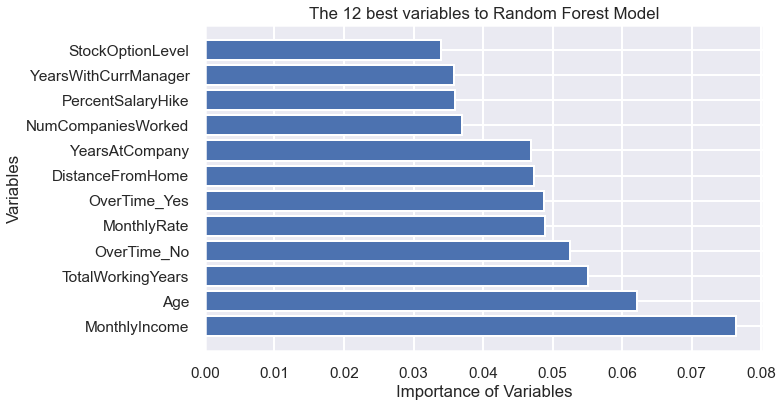

In [68]:
# To create a dictionary with the best variables

importance_dict = {feature_names[i]: feature_importances[i] for i in range(len(feature_importances))}

# To create a ranking
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

# top12
top_n = 12  

top_n_features = [feat[0] for feat in sorted_importance[:top_n]]
top_n_importances = [feat[1] for feat in sorted_importance[:top_n]]

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_n_features)), top_n_importances, align='center')
plt.yticks(np.arange(len(top_n_features)), top_n_features)
plt.xlabel('Importance of Variables')
plt.ylabel('Variables')
plt.title(f'The {top_n} best variables to Random Forest Model')
plt.show()

# Expected results <a name="expected-results"></a>

#### We had a database with 35 variables. After detailed analysis and the use of Machine Learning, we found out that 12 variables could explain attrition in that fictitious company. So, salary, age, and years of work experience are the most significant influencers on the target variable (Attrition).

1. Age: 
    The mean age of the workers is 36 years old. This company doesn't appear to be a good place to stay until retirement.


2. Salary: 
    There is an outlier receiving 19,999 dollars, which is curious because the mean salary is 6,502.93 dollars with a standard deviation of 4,707.95 dollars. Perhaps the salary policy is not fair.


3. Years of Work Experience: 
    The mean years of work experience is 11 with a standard deviation of 7. The employee profile is in the middle of their careers. The company doesn't seem like a good place for building a long-term career."
